<a href="https://colab.research.google.com/github/arelies-proximo/Python-Advanced/blob/main/Advance_Python%20(Iterators%2C%20Generators%2C%20Set/dict%20comprehension%2C%20Regex%2C%20Pickling%2C%20Partial%20n%20Nested%20Function%2C%20Decorators%2C%20Map%2C%20Reduce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ITERATORS AND GENERATORS

In [ ]:
#Iterators
l = [1,2,3,]

i1 = iter(l)
i1

In [ ]:
next(i1)

1

In [ ]:
next(i1)

2

In [ ]:
print(next(i1))

3


In [ ]:
next(i1)

StopIteration: ignored

In [ ]:
#Internal working of for loop
l = [1,2,3,4]

iter_obj = iter(l)

while True: #infinite loop
  try:
    item = next(iter_obj)
    print(item)
  except StopIteration:
    break


1
2
3
4


In [ ]:
#Writing Generators

def gen(d):
  for x,y in d.items():
    yield x,y

a = {1:"Value1", 2:"Value 2", 3:'The Last Value'}

#generator object for the function
obj = gen(a)

print(obj)

next(obj)

<generator object gen at 0x7f3beb3aceb0>


(1, 'Value1')

In [ ]:
next(obj)

(2, 'Value 2')

In [ ]:
next(obj)

(3, 'The Last Value')

In [ ]:
#GENEARTOR PIPELINE
def fibonacci_numbers(nums):
    x, y = 0, 1
    for _ in range(nums):
      x, y = y, x+y
      print("x: ",x)
      yield x

def square(nums):
    for num in nums:
      print("num**2: ",num**2)
      yield num**2


print(square(fibonacci_numbers(10)))

print("\nSum: ",sum(square(fibonacci_numbers(10))))

<generator object square at 0x7f3beb346040>
x:  1
num**2:  1
x:  1
num**2:  1
x:  2
num**2:  4
x:  3
num**2:  9
x:  5
num**2:  25
x:  8
num**2:  64
x:  13
num**2:  169
x:  21
num**2:  441
x:  34
num**2:  1156
x:  55
num**2:  3025

Sum:  4895


In [ ]:
#generator example

def ex(a):
  yield a
  a *= a
  yield a

obj = ex(9)
print(next(obj))

print(next(obj))

print(next(obj))

9
81


StopIteration: ignored

In [ ]:
#generators with for loop

def ex(a):
  yield a
  a *= a
  yield a

obj = ex(9)

for i in obj:
  print(i)

9
81


In [ ]:
a = range(10)
a

range(0, 10)

In [ ]:
for i in a:
  print(i)

0
1
2
3
4
5
6
7
8
9


In [ ]:
#GENERATOR EXPRESSION

r = range(6)

print("List Comprehensino: ",end="")
ls = [x*10 for x in r]
print(ls)
  #ALL VALUES WILL BE GENERATED AT ONCE USING LIST COMPREHENSION

print("Generator Expression: ",end="")

gen_ex = (x*100 for x in r)
print(gen_ex)

List Comprehensino: [0, 10, 20, 30, 40, 50]
Generator Expression: <generator object <genexpr> at 0x7f3beb3ac430>


In [ ]:
print("1st item: ",next(gen_ex))

print("2nd item generated: ",next(gen_ex))

for i in gen_ex:
  print(i)

1st item:  0
2nd item generated:  100
200
300
400
500


In [ ]:
gen_ex = (x*100 for x in r)
print(gen_ex)

print(max(gen_ex))

<generator object <genexpr> at 0x7f3beb325ac0>
500


In [ ]:
# Heading

In [ ]:
#Fibonacci using Generation

def fib(n):
  f,s = 0,1
  while True:
    yield f
    f,s = s, f+s
    if f>=n:
      break

for i in fib(50):
  print(i, end=" ")

0 1 1 2 3 5 8 13 21 34 

In [ ]:
#GENERATING NUMBER STREAM

def stream(i,n):

  while i<=n:
    yield i
    i+= 10

for x in stream(800,1000):
  print(x, end=" ")


800 810 820 830 840 850 860 870 880 890 900 910 920 930 940 950 960 970 980 990 1000 

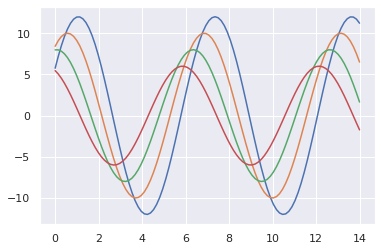

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb 

def s(flip=2):
  x = np.linspace(0,14,100)
  for i in range(1,5):
    plt.plot(x, np.sin(x+i*.5)*(7-i)*flip)
  

sb.set()
s()
plt.show()


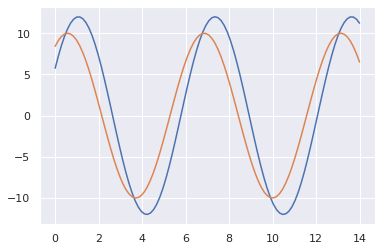

In [ ]:
#USING GENERATOR TO PRODUCE SIN WAVE ONE AT A TIME

def s(flip=2):
  x = np.linspace(0,14,100)
  for i in range(1,5):
    yield(plt.plot(x, np.sin(x+i*.5)*(7-i)*flip))
  

sb.set()
obj = s()

plt.show()

print(next(obj))
print(next(obj))

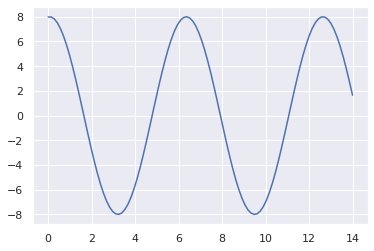

In [ ]:
print(next(obj))

In [ ]:
next(s)

TypeError: ignored

In [ ]:
#CUSTOM ITERATOR

class PowTwo:
    """Class to implement an iterator
    of powers of two"""

    def __init__(self, max=0):
        self.max = max

    def __iter__(self):
        self.n = 0
        return self

    def __next__(self):
        if self.n <= self.max:
            result = 2 ** self.n
            self.n += 1
            return result
        else:
            raise StopIteration


# create an object
numbers = PowTwo(3)

# create an iterable from the object
i = iter(numbers)

# Using next to get to the next iterator element
print(next(i)) # prints 1
print(next(i)) # prints 2
print(next(i)) # prints 4
print(next(i)) # prints 8
print(next(i)) # raises StopIteration exception

1
2
4
8


StopIteration: ignored

In [ ]:
from itertools import count

# create an infinite iterator that starts at 1 and increments by 1 each time
infinite_iterator = count(1)

# print the first 5 elements of the infinite iterator
for i in range(5):
    print(next(infinite_iterator))

In [ ]:
import sys
sys.path

['/content',
 '/env/python',
 '/usr/lib/python38.zip',
 '/usr/lib/python3.8',
 '/usr/lib/python3.8/lib-dynload',
 '',
 '/usr/local/lib/python3.8/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.8/dist-packages/IPython/extensions',
 '/root/.ipython']

In [ ]:
def gen(a=100):
  print("First Yield")
  yield a*999

  print("Return :")
  return 70

  print("The second yield: ", end="")
  yield a+99

g = gen()
next(g)

First Yield


99900

In [ ]:
next(g)

Return :


StopIteration: ignored

In [ ]:
next(g)

The second yield: 

199

In [ ]:
next(g)

The Third yield: 


333333333333

In [ ]:
next(g)

Now, the Stop Iteration Exception


StopIteration: ignored

# LIST COMPREHENSION
# **SET AND DICTIONARY COMPREHENSION**

In [ ]:
fruits = ['apple', 'cherry', 'pineapple', 'orange', 'mango']

#get fruits having 'a' in them

res = []
for i in fruits:
  if 'a' in i:
    res.append(i)

print(res)

['apple', 'pineapple', 'orange', 'mango']


In [ ]:
#using list comprehension

res_0 = [fruit for fruit in fruits if 'a' in fruit]

res_0

['apple', 'pineapple', 'orange', 'mango']

In [ ]:
#NESTED IF in list comprehension

[i for i in range(100) if i%7==0 if i%5==0]
          #number divisible by 7 and,then divisible by 5

[0, 35, 70]

In [ ]:
#if else in list comprehension

[str(i) + " Even" if i%2==0 else str(i)+" Odd" for i in range(10)]

['0 Even',
 '1 Odd',
 '2 Even',
 '3 Odd',
 '4 Even',
 '5 Odd',
 '6 Even',
 '7 Odd',
 '8 Even',
 '9 Odd']

In [ ]:
[i for i in range(10) if i%2==0 else 'Odd']

SyntaxError: ignored

In [ ]:
i for i in range(10)

SyntaxError: ignored

In [ ]:
list(i for i in range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
#Function in List Comprehension

def pow(x):
  return x**5

[pow(i) for i in range(20)]

[0,
 1,
 32,
 243,
 1024,
 3125,
 7776,
 16807,
 32768,
 59049,
 100000,
 161051,
 248832,
 371293,
 537824,
 759375,
 1048576,
 1419857,
 1889568,
 2476099]

In [ ]:
#SET COMPREHENSION using {}

sent = "Death is nothing, but to live defeated and inglorious is to die daily."

set_vowels = {i for i in sent if i in 'aeiou'}

set_vowels

{'a', 'e', 'i', 'o', 'u'}

In [ ]:
#Dict Comprehension using {}

sent = "Death is nothing, but to live defeated and inglorious is to die daily."

d_vowels = {i:  sent.count(i) for i in sent if i in 'aeiou'}

d_vowels

{'e': 6, 'a': 4, 'i': 8, 'o': 5, 'u': 2}

In [ ]:
d = {i: i**i for i in range(1,11)}
d

{1: 1,
 2: 4,
 3: 27,
 4: 256,
 5: 3125,
 6: 46656,
 7: 823543,
 8: 16777216,
 9: 387420489,
 10: 10000000000}

## ****REGULAR EXPRESSION**
# Single hash
 No hash

In [ ]:
import re

In [ ]:
s = "The a"

res = re.match('a', s)
print(res)

None


In [ ]:
print(re.match('Tha', s))

None


In [ ]:
print(re.search("The", s))

<re.Match object; span=(0, 3), match='The'>


In [ ]:
print(re.search(r"[Tha]", s))
  #Checks of any character which mathces the first letter of string

<re.Match object; span=(0, 1), match='T'>


In [ ]:
s = 'xbthththt'

print(re.search(r"Thx", s))

None


In [ ]:
print(re.search(r"[Thx]", s))

<re.Match object; span=(0, 1), match='x'>


In [ ]:
s = "The a"

re.search('a', s)

<re.Match object; span=(4, 5), match='a'>

In [ ]:
s = "The a   x"

re.search(r'[xa]', s)

<re.Match object; span=(4, 5), match='a'>

In [ ]:
s = "The world is collapsing and there is nowhere to hide from the zombies"

re.findall("he", s)

['he', 'he', 'he', 'he']

In [ ]:
re.findall(r"[osg]", s)
  #find all for each characters

['o', 's', 'o', 's', 'g', 's', 'o', 'o', 'o', 'o', 's']

In [ ]:
r[1-9]

NameError: ignored

In [ ]:
x = '12345678 A 91 DD 937805784'

re.findall(r"[^1-9]", x)

[' ', 'A', ' ', ' ', 'D', 'D', ' ', '0']

In [ ]:
re.findall(r'..', 'a')

[]

In [ ]:
re.findall(r'..', 'ac')

['ac']

In [ ]:
re.findall(r'..', 'ace')

['ac']

In [ ]:
re.findall(r'..', 'acex')

['ac', 'ex']

In [ ]:
re.findall(r'^a.', 'acex')

['ac']

In [ ]:
re.findall(r'^a.', 'facex')

[]

In [ ]:
re.findall(r'^fa.', 'facex')

['fac']

In [ ]:
re.findall(r'^fa.', 'fxcex')

[]

In [ ]:
re.search(r'x$', 'james and x')

<re.Match object; span=(10, 11), match='x'>

In [ ]:
print(re.findall(r'x*p', ' xp '))

['xp']


In [ ]:
print(re.findall(r'x*p', ' xxxxxp '))

['xxxxxp']


In [ ]:
print(re.findall(r'x*p', '  p faxpxxxxp'))

['p', 'xp', 'xxxxp']


In [ ]:
print(re.findall(r'ma?n', ' mn man maaan  main  woman '))

['mn', 'man', 'man']


In [ ]:
re.findall(r'\^*a', ' 12  ^^^ab ^a')

['^^^a', '^a']

In [ ]:
re.findall(r'\d{2,3}|a', ' 12  ab 8 98 8990 a')

['12', 'a', '98', '899', 'a']

In [ ]:
re.split(r'!', 'Jam ! es ! end ! another !', 2)
  #max two splits

['Jam ', ' es ', ' end ! another !']

## SERIALIZATION N DESERIALIZATION

In [ ]:
import pickle


test_dict = {"Hello": "World!", "Key 2": 1000}

with open("test_pickle.txt", "wb") as outfile:
 # "wb" argument opens the file in binary mode
 pickle.dump(test_dict, outfile)

In [ ]:
with open("test_pickle.txt", "r") as f:
  f.readlines()

UnicodeDecodeError: ignored

In [ ]:
with open("test_pickle.txt", "rb") as f:
  d = pickle.load(f)
  print(d)

print('\nEnd!')

{'Hello': 'World!', 'Key 2': 1000}

End!


In [ ]:
dt = {"Hello": "World!", "Key 2": 1000}

ser_string = pickle.dumps(dt)

print(ser_string)

b'\x80\x04\x95!\x00\x00\x00\x00\x00\x00\x00}\x94(\x8c\x05Hello\x94\x8c\x06World!\x94\x8c\x05Key 2\x94M\xe8\x03u.'


In [ ]:
#DESERIALIZATION
d = pickle.loads(ser_string)
d

{'Hello': 'World!', 'Key 2': 1000}

##**PARTIAL FUNCTION**

In [ ]:
#PARTIAL FUNCTION

def power(base, exponent):
  print(f"{base} to the power {exponent} is: "+ str(base**exponent))
  return base**exponent


def square(base):
  #uses the power function
  return power(base, 2)


def cube(num):
  #it uses the power function with expo as 3
  return power(num, 3)


In [ ]:
power(5,2)
square(5)

power(5,3)
cube(5)

5 to the power 2 is: 25
5 to the power 2 is: 25
5 to the power 3 is: 125
5 to the power 3 is: 125


125

In [ ]:
from functools import partial

def power(base, exponent):
  print(f"{base} to the power {exponent} is: "+ str(base**exponent))
  return base**exponent


In [ ]:
square = partial(power, exponent=2)
cube = partial(power, exponent=3)

quad = partial(power, exponent=4)

In [ ]:
square(5)

cube(5)

quad(5)

5 to the power 2 is: 25
5 to the power 3 is: 125
5 to the power 4 is: 625


625

In [ ]:
def f(a, b, c, d):
  print(f"{a}*{b}*{c}*{d}: ", a*b*c*d)
  return a*b*c*d


only_two = partial(f, 4, d=10)

only_two(8,1)

4*8*1*10:  320


320

In [ ]:
only_two(8,1)

4*10*8*1:  320


320

# NESTED FUNCTIONS

In [ ]:
def greet(name):
    # inner function
    def display_name():
        print("Hi", name)
    
    display_name()
      #calling inner function

greet("Asif Khan")

Hi Asif Khan


In [ ]:
def outer_f(t):
  x = t
  def inner_f():
    print(x)
      #inner function can access the variable from outer funct 

  inner_f()
    #calling inner function within outer f

outer_f("Heya")

Heya


In [ ]:
inner_f()

NameError: ignored

In [ ]:
def outer_f(t):
  x = t
  def inner_f():
    print(x)

  return inner_f
    #returning the inner_f 
    #NOT CALLING, NO ()


var = outer_f("Lena Haedy")

In [ ]:
var

<function __main__.outer_f.<locals>.inner_f()>

In [ ]:
var()

Lena Haedy


In [ ]:
def make_multiplier_of(n):
    def multiplier(x):
        return x * n
    return multiplier


# Multiplier of 3
times3 = make_multiplier_of(3)

# Multiplier of 5
times5 = make_multiplier_of(5)

print(times3(9))

print(times5(3))

27
15


In [ ]:
times5(times3(2))

30

In [ ]:
def calculate():
    num = 1
    def inner_func():
        nonlocal num
        num += 2
        return num
    return inner_func

# call the outer function
odd = calculate()

# call the inner function
print(odd())
print(odd())
print(odd())

# call the outer function again
odd2 = calculate()
print("Calling from odd2, newly created: ",odd2())


print("odd (previous function) called again: ",odd())

3
5
7
Calling from odd2, newly created:  3
odd (previous function) called again:  9


In [ ]:
def h():
  print("Hey\n")


new_name = h

another_name = new_name

print("h(): ", end="")
h()

print("new_name(): ", end="")
new_name()

another_name()

h(): Hey

new_name(): Hey

Hey



In [ ]:
del h
  #deleting the orignial

new_name()

Hey



## ****POLYNOMIAL FUNCTION**
# Implementing any type (degree) of Polynomial Functions

In [ ]:
#Polynomial Function

def polynomial_creator(a,b,c):
    #taking the coefficient of the polynomial

  def polynomial(x):
      #inner function takes the x values
      return a*x**2 + b*x + c

  return polynomial

In [ ]:
p1 = polynomial_creator(2,3, -1)
p1

<function __main__.polynomial_creator.<locals>.polynomial(x)>

In [ ]:
p1(10)

229

In [ ]:
p1(1)

4

In [ ]:
p1(2)

13

In [ ]:
def polynomial_creator(*coefficient):

  def polynomial(x):
    eqtn = 0

    for index, coeff in enumerate(coefficient[::-1]):
      eqtn += coeff * x ** index
    return eqtn
    
  return polynomial


In [ ]:
p_deg_2 = polynomial_creator(2,3,-1)
p_deg_2

<function __main__.polynomial_creator.<locals>.polynomial(x)>

In [ ]:
p_deg_2(1)

4

In [ ]:
p_deg_2(2)

13

In [ ]:
p_deg_1 = polynomial_creator(2,4)
p_deg_1(10)

24

In [ ]:
def poly_creator(*coeff):

  def polynomial(x):
    res = coeff[0]
    for i in range(1,len(coeff)):
      res = res *x  + coeff[i]
        # (prev eqtn)*x + new_coefficient

    return res

  return polynomial

In [ ]:
p1 = poly_creator(2,3,-1)
p1(1)

4

In [ ]:
p1(2)

13

In [ ]:
p1(10)

229

#DECORATORS

In [ ]:
def decorator_f( func ):

  def func_wrapper(x):
    print("B4 calling another functions: " + func.__name__)

    func(x)

    print("After calling func: "+ func.__name__)

  return func_wrapper

In [ ]:
def foo(y):
  print("Function foo called, x: ", str(y))

In [ ]:
foo(100)

Function foo called, x:  100


In [ ]:
#Decorating foo
foo = decorator_f(foo)
foo

<function __main__.decorator_f.<locals>.func_wrapper(x)>

In [ ]:
#After decoration

foo(100)

B4 calling another functions: foo
Function foo called, x:  100
After calling func: foo


In [ ]:
def smart_divide(func):
    def inner(a, b):
        print("I am going to divide", a, "and", b)
        if b == 0:
            print("Whoops! cannot divide")
            return

        return func(a, b)
    return inner

@smart_divide
def divide(a, b):
    print(a/b)

divide(2,5)

divide(2,0)

I am going to divide 2 and 5
0.4
I am going to divide 2 and 0
Whoops! cannot divide


# MAP

In [ ]:
x = map(int, input(":> ").split())
x

:> 10 20 30 40 50


In [ ]:
list(x)

[10, 20, 30, 40, 50]

In [ ]:
list(map(int, input(":> ").split()))

:> 1 2 3 4 5


[1, 2, 3, 4, 5]

In [ ]:
def mult(a,b=10):
  return a*b


list(map(mult ,[1,2,3,4,5,6]))

[10, 20, 30, 40, 50, 60]

In [ ]:
for i in map(mult, (8,9,5,6,1,3)):
  print(i, end=" ")

80 90 50 60 10 30 

In [ ]:
list(map( (lambda x: x**3), {0,1,1,2,2,3,4,5,6,6}))

[0, 1, 8, 27, 64, 125, 216]

In [ ]:
#LIST of FUNCTION within lambda

def square(x):
  return x**2

def cube(x):
  return x**3

def quad(x):
  return x**4

func = [square, cube, quad]

for i in range(5):
  vals = map(lambda x: x(i), func)
  print("i=",i,":> ",list(vals))

i= 0 :>  [0, 0, 0]
i= 1 :>  [1, 1, 1]
i= 2 :>  [4, 8, 16]
i= 3 :>  [9, 27, 81]
i= 4 :>  [16, 64, 256]


In [ ]:
"".join(map(lambda x: x.upper(), "is it true"))

'IS IT TRUE'

In [ ]:
l1 = [1,2,3,4]
l2 = (10, 100, 1000, 10000)

list(map(lambda x: x/2, (map(lambda x,y: x*y, l1, l2))))

[5.0, 100.0, 1500.0, 20000.0]

# FILTERS

In [ ]:
list(filter(lambda x: x%2==0, [0,1,2,3,4,5,6,7,8,9]))

[0, 2, 4, 6, 8]

In [ ]:
def vow(x):
  if x in 'aeiouAEIOU':
    return True
  return False

list(filter(vow, "James was an Honest Man, but the Aryans didn't know"))

['a', 'e', 'a', 'a', 'o', 'e', 'a', 'u', 'e', 'A', 'a', 'i', 'o']

In [ ]:
l = [1, 'a', 0, False, True, '0', None]

list(filter(None, l))

[1, 'a', True, '0']

#**REDUCE from functools module**

In [ ]:
import functools as ft

In [ ]:
ft.reduce(lambda x,y: x+y, [1,2,3,4,5,6,7,8,9,10])

55

In [ ]:
ft.reduce(lambda x,y:x*y, [1,2,3,4,5])

120

In [ ]:
# importing itertools for accumulate()
import itertools
 
# importing functools for reduce()
import functools as ft
 
lis = [1, 3, 4, 10, 4]
 
#summation using accumulate()
print("The summation of list using accumulate is :", end="")
print(list(itertools.accumulate(lis, lambda x, y: x+y)))
 
# printing summation using reduce()
print("The summation of list using reduce is :", end="")
print(ft.reduce(lambda x, y: x+y, lis))

The summation of list using accumulate is :[1, 4, 8, 18, 22]
The summation of list using reduce is :22
